oh no


c:\Users\Mohamed Amr\Downloads\drive-download-20240804T174950Z-001\lab.py:407: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((x2 - x1) * 2 + (y2 - y1) * 2)


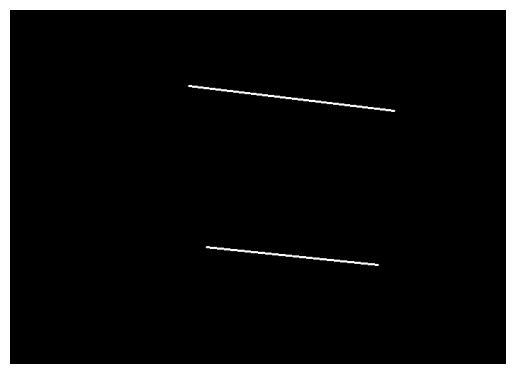

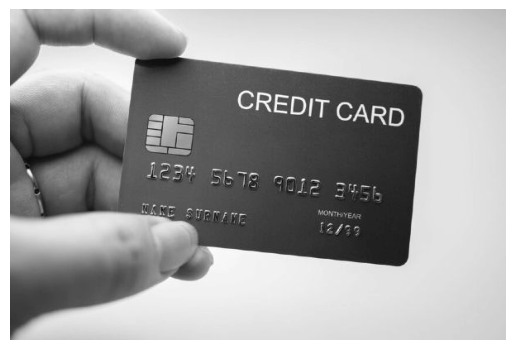

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


NameError: name 'bottomx' is not defined

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import os
import lab
image = lab.load_img(11)
# print(image)
#lab.show_image(img,'')
trial = lab.padder(image)
#img = lab.sharp(img)
#trial = lab.dilation(img)
#contrasted_image = cv2.equalizeHist(img)
#lab.show_image(contrasted_image,"let's see")
sobelcanny = lab.sobel(trial,50,80)
trial = sobelcanny
#lab.show_image(sobelcanny,'')
#trial = lab.dilation(trial,3)
trial = lab.detect_and_draw_longest_lines(trial)
#lab.show_image(trial,'')

#lab.show_image(trial,"let's see")
trial,OG = lab.process_image_for_horizontal_longest_line(trial,image)
#trial = lab.erosion(trial)
#hr=lab.detect_horizontal_edges(trial)
lab.show_image(trial,'')
lab.show_image(OG,'')
trial = lab.create_vertical_edge_mask(trial)
# Define the x-coordinate of the vertical line
vertical_x,_ = trial.shape
vertical_x /= 2
# Draw the vertical line for visualization (optional)
image_with_line = image.copy()
cv2.line(image_with_line, (int(vertical_x), 0), (int(vertical_x), image.shape[0]), (0, 255, 0), 2)

# Detect intersections and crop the image
#cropped_image = lab.crop_image_at_intersections(image, vertical_x)
#trial = cv2.imread(trial, cv2.IMREAD_GRAYSCALE)
#trial = lab.sobel(trial,20,120)
#sobelcanny = lab.rotato(sobelcanny)


#corner detection and cropping
edges=trial
print(edges)
#plt.imshow(img, cmap='gray');
top = -1
bottom = -1
left = -1
right = -1

# Get image dimensions
height, width = edges.shape
for y in range(height):
    for x in range(width):
        if edges[y, x] > 100:  # White pixel
            if top == -1:
                top = y
            bottom = y
            bottomx = x
            if left == -1 or x < left:
                left = x
                lefty=y
            if right == -1 or x > right:
                right = x
                righty=y

# Print the found edge coordinates
print(f"Top: {top} , Bottom: {bottom},{bottomx} ,Left: {left},{lefty}, Right: {right}")
print(width,height)
# Ensure all boundaries are valid
if top != -1 and bottom != -1 and left != -1 and right != -1:
    # Crop the image using the bounding box
    cropped_img = trial[top:bottom+1, left:right+1]
    height, width = trial.shape
    #cropped_img = trial[int(0.5293*height):int(0.6643*height),int(0.0633*width):int(0.9219*width)]
    #lab.show_image(trial,'img')
    font_path = r"C:\Users\hotoe\Desktop\CREDC___.ttf"  # Update this path to your TTF file
    template_dir = r'templates'
    #image_path = 'sample_image.png'  # Path to the image you want to process

    # Generate templates
    #generate_templates(font_path, template_dir)

    # Perform template matching
    #match_template(cropped_img, template_dir)
    # Display the results

else:
    print("No edges found!")

if image is None:
    print("Error loading image.")
else:
  #  plt.imshow(img_sobel2, cmap="gray")
    plt.show()